In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [2]:
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', encoding='utf-8')
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1524
1,tt0000002,6.3,185
2,tt0000003,6.6,1170
3,tt0000004,6.3,113
4,tt0000005,6.2,1882


__Анализ влияния жанра фильма на его рейтинг__

__Предположение: жанр влияет на его рейтинг__

__Гипотеза H0: рейтинг фильма не зависит от жанра__

__Гипотеза H1: рейтинг фильма зависит от жанра__

In [5]:
# изучим типы видео из датасета (столбец titleType):
title_types = basics.titleType.unique()
print(title_types)

['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [6]:
# выберем тип кино (movie):
movies = basics[basics.titleType == 'movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


In [7]:
# удалим записи в которых не указан жанр фильма
movies = movies[movies.genres != '\\N']

In [8]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"
611,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [9]:
# взглянем на жанры (столбец genres):
genres = tuple(movies.genres.unique())
print(genres[:25])

('Romance', 'Documentary,News,Sport', 'Biography,Drama', 'Biography,Crime,Drama', 'Drama', 'Adventure,Fantasy', 'Comedy', 'Drama,War', 'Documentary', 'Crime', 'Drama,Romance', 'Adventure,Drama', 'Biography,Drama,Family', 'Drama,History', 'War', 'Biography,Drama,History', 'Sci-Fi', 'Adventure,Drama,Fantasy', 'Documentary,War', 'History,War', 'Drama,Western', 'Adventure', 'Drama,Thriller', 'Western', 'Comedy,Drama')


In [10]:
# некоторые фильмы относятся сразу к нескольким жанрам
# напишем функцию, которая позволит отобрать нужные названия жанров в зависимости от заданного поиска

def get_target_genres(data, target):
    target_genres = []
    for genre in data:
        tmp_list = str(genre).lower().split(',') 
        for item in tmp_list:
            if item in target:
                target_genres.append(str(genre))
    return target_genres

In [11]:
columns = ['tconst', 'primaryTitle', 'genres']

fantasy_genres = get_target_genres(data=genres, target=('fantasy'))
fantasy_movies = movies[movies.genres.isin(fantasy_genres)].loc[:, columns].reset_index(drop=True)

horror_genres = get_target_genres(data=genres, target=('horror'))
horror_movies = movies[movies.genres.isin(horror_genres)].loc[:, columns].reset_index(drop=True)

action_genres = get_target_genres(data=genres, target=('action'))
action_movies = movies[movies.genres.isin(action_genres)].loc[:, columns].reset_index(drop=True)

In [12]:
movies_ratings = movies.loc[:, columns].merge(ratings)
movies_ratings.head()

,tconst,primaryTitle,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Romance,5.5,80
1,tt0000147,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport",5.2,301
2,tt0000335,Soldiers of the Cross,"Biography,Drama",6.3,39
3,tt0000574,The Story of the Kelly Gang,"Biography,Crime,Drama",6.2,516
4,tt0000615,Robbery Under Arms,Drama,4.8,15


В качестве жанров для исследования выберем:

    фэнтези (fantasy)
    ужасы (horror)
    боевик (action)

In [13]:
columns = ['tconst', 'primaryTitle', 'averageRating', 'genres', 'numVotes']

fantasy_genres = get_target_genres(data=genres, target=('fantasy'))
fantasy_movies = movies_ratings[movies_ratings.genres.isin(fantasy_genres)].loc[:, columns].reset_index(drop=True)

horror_genres = get_target_genres(data=genres, target=('horror'))
horror_movies = movies_ratings[movies_ratings.genres.isin(horror_genres)].loc[:, columns].reset_index(drop=True)

action_genres = get_target_genres(data=genres, target=('action'))
action_movies = movies_ratings[movies_ratings.genres.isin(action_genres)].loc[:, columns].reset_index(drop=True)

Так как часть фильмов имеет смешанный жанр, выделим в 3 отдельные группы фильмы, которые:

    относятся к фэнтези, но не относятся к ужасам и боевикам
    относятся к ужасам, но не относится к фэнтези и боевикам
    относятся к боевикам, но не относятся к фэнтези и ужасам

In [14]:
fantasy = tuple(set(fantasy_movies.tconst) - set(horror_movies.tconst) - set(action_movies.tconst))
horror = tuple(set(horror_movies.tconst) - set(fantasy_movies.tconst) - set(action_movies.tconst))
action = tuple(set(action_movies.tconst) - set(fantasy_movies.tconst) - set(horror_movies.tconst))

In [15]:
fantasy_only = fantasy_movies[fantasy_movies.tconst.isin(fantasy)].reset_index(drop=True)
fantasy_only['genres'] = 'fantasy'

horror_only = horror_movies[horror_movies.tconst.isin(horror)].reset_index(drop=True)
horror_only['genres'] = 'horror'

action_only = action_movies[action_movies.tconst.isin(action)].reset_index(drop=True)
action_only['genres'] = 'action'

In [16]:
print(f'Fantasy only: {fantasy_only.shape[0]} movies')
print(f'Horror only: {horror_only.shape[0]} movies')
print(f'Action only: {action_only.shape[0]} movies')

Fantasy only: 4865 movies
Horror only: 14080 movies
Action only: 23203 movies


Получившиеся группы фильмов по жанрам отличаются по количеству.

Для дальнейшнего анализа отберем из каждой группы (жанра) по 4000 наблюдений случайным образом.

In [17]:
n_sample = 4000

y1 = fantasy_only.sample(n=n_sample, random_state=42).averageRating.values
y2 = horror_only.sample(n=n_sample, random_state=42).averageRating.values
y3 = action_only.sample(n=n_sample, random_state=42).averageRating.values

n1 = len(y1)
n2 = len(y2)
n3 = len(y3)

n = n1 + n2 + n3
k = 3

print(f'Fantasy only: {n1}\nHorror only: {n2}\nAction only: {n3}\nTotal: {n}')

Fantasy only: 4000
Horror only: 4000
Action only: 4000
Total: 12000


In [18]:
y1_mean = np.mean(y1)
y2_mean = np.mean(y2)
y3_mean = np.mean(y3)

y1_s2 = np.var(y1, ddof=1)
y2_s2 = np.var(y2, ddof=1)
y3_s2 = np.var(y3, ddof=1)

print(f'Средняя и среднекватрическая фильмов жанра Фантастика: mean = {np.round(y1_mean, 4)}, std = {np.round(y1_s2**0.5, 4)}')
print(f'Средняя и среднекватрическая фильмов жанра Ужасы: mean = {np.round(y2_mean, 4)}, std = {np.round(y2_s2**0.5, 4)}')
print(f'Средняя и среднекватрическая фильмов жанра Боевик: mean = {np.round(y3_mean, 4)}, std = {np.round(y3_s2**0.5, 4)}')

Средняя и среднекватрическая фильмов жанра Фантастика: mean = 6.135, std = 1.286
Средняя и среднекватрическая фильмов жанра Ужасы: mean = 5.0668, std = 1.353
Средняя и среднекватрическая фильмов жанра Боевик: mean = 5.805, std = 1.3026


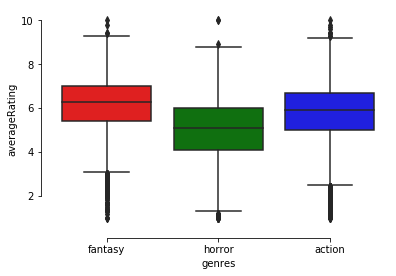

In [19]:
movies_only = pd.concat([fantasy_only, horror_only, action_only]).reset_index(drop=True)

sns.boxplot(x="genres", y="averageRating", palette=["r", "g", "b"], data=movies_only)
sns.despine(offset=10, trim=True)

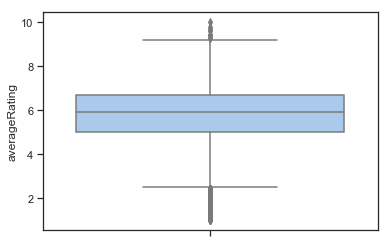

In [20]:
# выбросов не должно быть, но все же глянем :)

sns.set(style="ticks", palette="pastel")
sns.boxplot(action_movies.averageRating, orient='v')

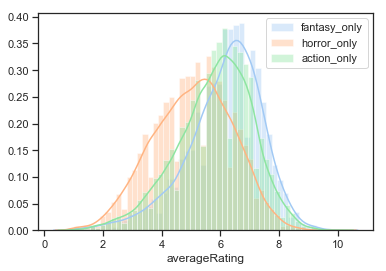

In [21]:
sns.distplot(fantasy_only.averageRating)
sns.distplot(horror_only.averageRating)
sns.distplot(action_only.averageRating)

plt.legend(labels=['fantasy_only', 'horror_only', 'action_only'])

In [22]:
y = np.concatenate([y1, y2, y3])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Общая средняя и среднекватрическая: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Общая средняя и среднекватрическая: mean = 5.6689, std = 1.3879


In [23]:
ss_g = np.sum((y - y_mean)**2)
ss_f = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2 + ((y3_mean - y_mean)**2) * n3
ss_r = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(ss_f, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(ss_r, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 23112.9146
Сумма квадратов отклонений средних групповых значений от общего среднего: 2393.4942
Остаточная сумма квадратов отклонений: 20719.4204


In [24]:
s2_g = ss_g / (n - 1)
s2_f = ss_f / (k - 1)
s2_r = ss_r / (n - k)

print(f'Общая дисперсия: {np.round(s2_g, 4)}')
print(f'Факторная дисперсия: {np.round(s2_f, 4)}')
print(f'Остаточная дисперсия: {np.round(s2_r, 4)}')

Общая дисперсия: 1.9262
Факторная дисперсия: 1196.7471
Остаточная дисперсия: 1.7271


Распределение Фишера–Снедекора (F-распределение): https://www.matburo.ru/tv/table_fisher.pdf

a = 0.05, v1 = k - 1 = 2, v2 = n - k = >60

Fтабл = 2.99

In [25]:
f_h = s2_f / s2_r
f_critical = 2.99 

print(f'F = {np.round(f_h, 4)}')
print(f'F_critical = {np.round(f_critical, 4)}')

F = 692.9429
F_critical = 2.99


Полученное значение F = 692.9429 > Fкрит = 2.99.

Таким образом, рейтинг фильма зависит от жанра.
Принимаем гипотезу H1.